# Introduction

Unsupervised classification, also referred to an a clustering algorithm, can be useful for a number of application (e.g., data exploration) and scikit-learn provides a large number of algorithms: https://scikit-learn.org/stable/modules/clustering.html.

Let's try and apply some of those algorithms through RSGISLib and using scikit-learn. Please be aware that clustering algorithm can be very time consuming to execute to becareful with the parameters which are being used.


## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_




# 1. Import Modules

In [1]:
# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# RSGISLib Modules
import rsgislib.classification.clustersklearn
import rsgislib.tools.mapping

/Users/pete/miniconda3/envs/osgeo-env-v3/lib/python3.10/site-packages/rsgislib/tools/mapping.py:16: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


# 2. Define the input image files

The input images files are defined:

In [2]:
# Input Sentinel-2 image file with 20 m resolution pixels.
input_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m.tif"

# 3. Apply KMeans Clusterer

Information on KMeans: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [3]:
from sklearn.cluster import MiniBatchKMeans

# Define the number of output classes/clusters as 10.
clusterer = MiniBatchKMeans(batch_size=100, n_clusters=10)

out_cls_img = "sen2_20180629_kmeans_cls.kea"
rsgislib.classification.clustersklearn.img_pixel_sample_cluster(
    input_img,
    out_cls_img,
    gdalformat="KEA",
    no_data_val=0,
    n_img_smpl=100,
    clusterer=clusterer,
    calc_stats=True,
    use_mean_shift_est_band_width=False,
)

Sample input image:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:00<00:00, 420.54it/s]
/Users/pete/miniconda3/envs/osgeo-env-v3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit Clusterer
Fitted Clusterer
Apply to whole image:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:01<00:00, 222.48it/s]


Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.



# 4. Visualise KMeans Result

Note, the assigned colours are random. Try looking at some different areas by editting the `sub_img_bbox` and also open the imagery within Tuiview.

Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


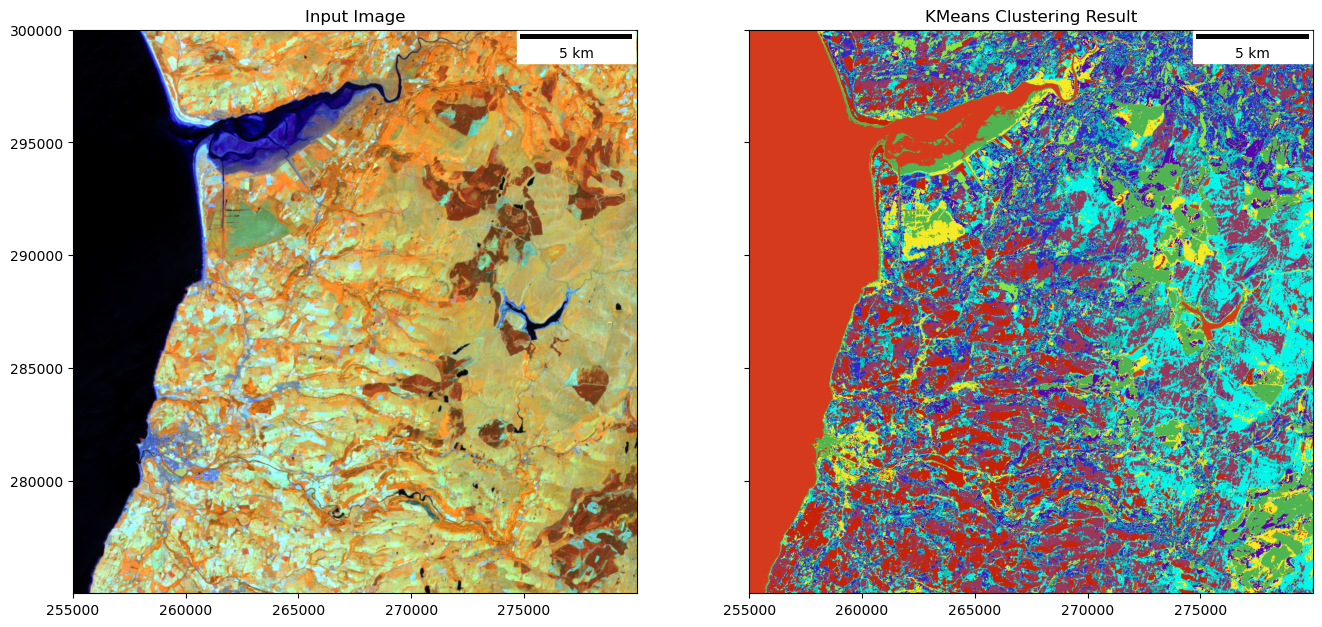

In [4]:
# Define a bbox for the subset to be displayed
# sub_img_bbox = [275000, 300000, 275000, 300000]
sub_img_bbox = [255000, 280000, 275000, 300000]
# sub_img_bbox = [295000, 300000, 295000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[8, 9, 3],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=sub_img_bbox,
    show_scale_bar=True,
)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img, bbox=sub_img_bbox)
ax2.title.set_text("KMeans Clustering Result")

# 5. Apply Mean-Shift Clusterer

Information on Mean-Shift: https://scikit-learn.org/stable/modules/clustering.html#mean-shift



In [5]:
from sklearn.cluster import MeanShift

clusterer = MeanShift()

out_cls_img = "sen2_20180629_meanshift_cls.kea"
rsgislib.classification.clustersklearn.img_pixel_sample_cluster(
    input_img,
    out_cls_img,
    gdalformat="KEA",
    no_data_val=0,
    n_img_smpl=100,
    clusterer=clusterer,
    calc_stats=True,
    use_mean_shift_est_band_width=True,
)

Sample input image:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:00<00:00, 416.26it/s]


Using Mean-Shift predict bandwidth
Fit Clusterer
Fitted Clusterer
Apply to whole image:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:01<00:00, 205.66it/s]


Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.



# 6. Visualise Mean-Shift Result

Note, the assigned colours are random. Try looking at some different areas by editting the `sub_img_bbox` and also open the imagery within Tuiview.

Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


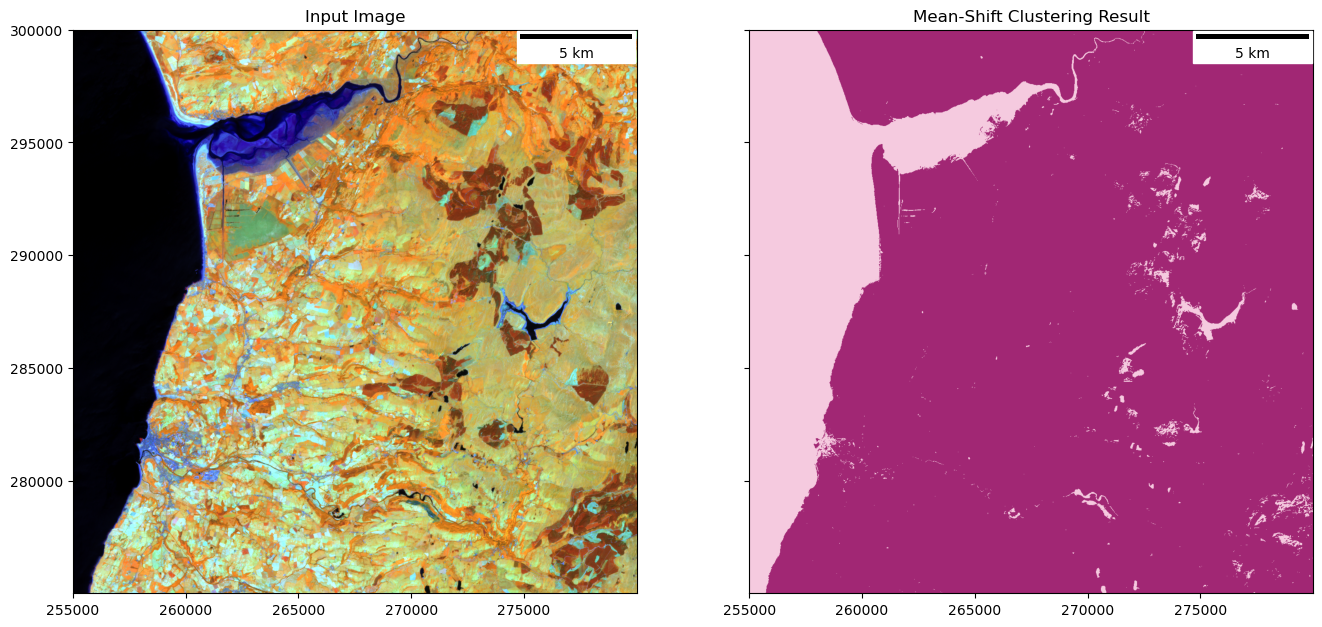

In [6]:
# Define a bbox for the subset to be displayed
# sub_img_bbox = [275000, 300000, 275000, 300000]
sub_img_bbox = [255000, 280000, 275000, 300000]
# sub_img_bbox = [295000, 300000, 295000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[8, 9, 3],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=sub_img_bbox,
    show_scale_bar=True,
)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img, bbox=sub_img_bbox)
ax2.title.set_text("Mean-Shift Clustering Result")

# 7. RSGISLib KMeans and ISOData Functions

RSGISLib has implementations of the KMeans and ISOData algorithms but rather than outputting an image, the cluster centres are outputted which are then applied using another function. The advantages of these functions is that they allow for a data sample to be used which for large input images can allow processing a much quicker time.



## 7.1 KMeans using RSGISLib Implementation

In [7]:
# Import the modules needed
import rsgislib
import rsgislib.imagecalc
import rsgislib.rastergis
import rsgislib.segmentation

In [8]:
# Calculate the cluster centres
rsgislib.imagecalc.kmeans_clustering(
    input_img,
    out_file="kmeans_centres",
    n_clusters=10,
    max_n_iters=200,
    sub_sample=100,
    ignore_zeros=True,
    degree_change=0.0025,
    init_cluster_method=rsgislib.INITCLUSTER_DIAGONAL_FULL_ATTACH,
)

inputImage = ../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m.tif
outputMatrixFile = kmeans_centres
numClusters = 10
maxNumIterations = 200
subSample = 100
degreeOfChange = 0.00249999994412


In [9]:
# Apply the Cluster Centres to the input image
out_cls_img = "sen2_20180629_kmeans_cls_rsgislib.kea"
rsgislib.segmentation.label_pixels_from_cluster_centres(
    input_img,
    output_img=out_cls_img,
    cluster_centres_file="kmeans_centres.gmtxt",
    ignore_zeros=True,
    gdalformat="KEA",
)

Ignoring Zeros
Full diag attached.
Subsampling the image to read into memory
Performing clustering
Starting Iterative processing...
Iteration 0 has change 15.3757791519 % of data clump IDs (10 clusters).
Iteration 1 has change 10.814997673 % of data clump IDs (10 clusters).
Iteration 2 has change 10.485162735 % of data clump IDs (10 clusters).
Iteration 3 has change 9.00775527954 % of data clump IDs (10 clusters).
Iteration 4 has change 7.11831903458 % of data clump IDs (10 clusters).
Iteration 5 has change 6.30374336243 % of data clump IDs (10 clusters).
Iteration 6 has change 6.6388463974 % of data clump IDs (10 clusters).
Iteration 7 has change 6.64727687836 % of data clump IDs (10 clusters).
Iteration 8 has change 6.24051570892 % of data clump IDs (10 clusters).
Iteration 9 has change 5.70835447311 % of data clump IDs (10 clusters).
Iteration 10 has change 5.37430477142 % of data clump IDs (10 clusters).
Iteration 11 has change 5.43331670761 % of data clump IDs (10 clusters).
Itera

In [10]:
# Build colour table and pyramids
rsgislib.rastergis.pop_rat_img_stats(
    clumps_img=out_cls_img, add_clr_tab=True, calc_pyramids=True, ignore_zero=True
)

Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.



Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


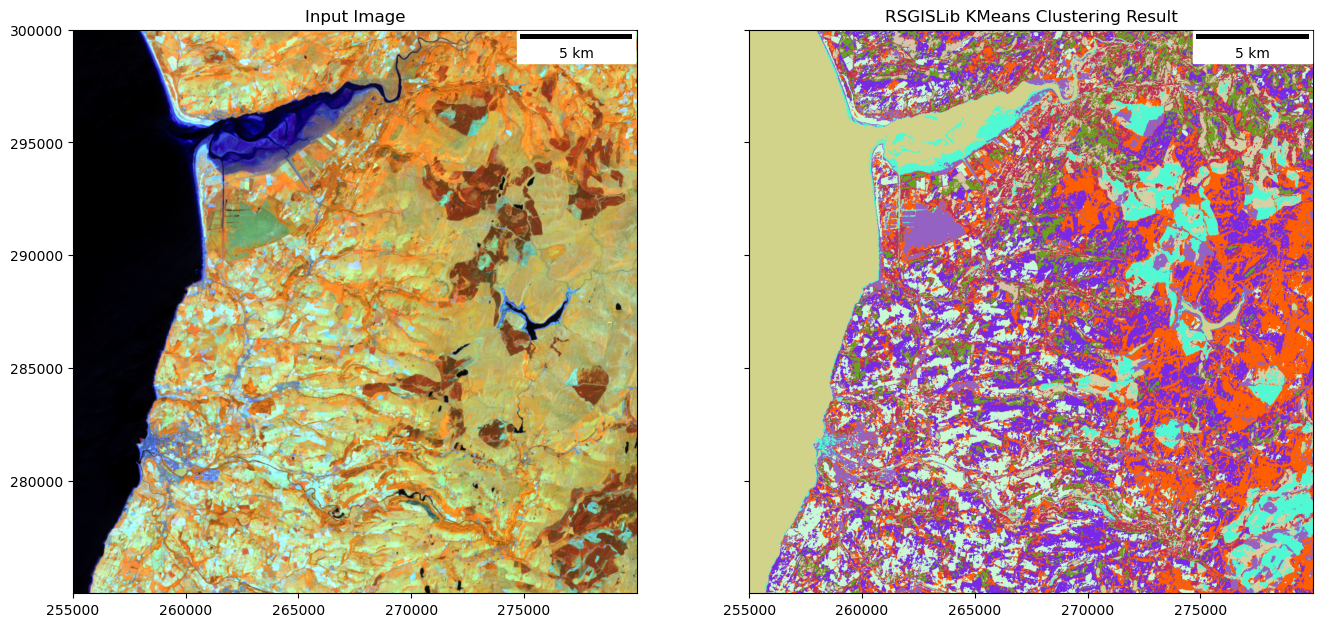

In [11]:
# Define a bbox for the subset to be displayed
sub_img_bbox = [255000, 280000, 275000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[8, 9, 3],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=sub_img_bbox,
    show_scale_bar=True,
)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img, bbox=sub_img_bbox)
ax2.title.set_text("RSGISLib KMeans Clustering Result")

## 7.1 ISODATA using RSGISLib Implementation

In [12]:
# Run the ISODATA clustering
rsgislib.imagecalc.isodata_clustering(
    input_img,
    out_file="isodata_centres",
    n_clusters=10,
    max_n_iters=200,
    sub_sample=100,
    ignore_zeros=True,
    degree_change=0.0025,
    init_cluster_method=rsgislib.INITCLUSTER_DIAGONAL_FULL_ATTACH,
    min_dist_clusters=1,
    min_n_feats=200,
    max_std_dev=30,
    min_n_clusters=8,
    start_iter=10,
    end_iter=100,
)

In [13]:
# Apply the Cluster Centres to the input image
out_cls_img = "sen2_20180629_isodata_cls_rsgislib.kea"
rsgislib.segmentation.label_pixels_from_cluster_centres(
    input_img,
    output_img=out_cls_img,
    cluster_centres_file="isodata_centres.gmtxt",
    ignore_zeros=True,
    gdalformat="KEA",
)

Subsampling the image to read into memory
Performing clustering
Starting Iterative processing...
Iteration 0 has change 15.3757791519 % of data clump IDs for 10 cluster centres.
Iteration 1 has change 10.814997673 % of data clump IDs for 10 cluster centres.
Iteration 2 has change 10.485162735 % of data clump IDs for 10 cluster centres.
Iteration 3 has change 9.00775527954 % of data clump IDs for 10 cluster centres.
Iteration 4 has change 7.11831903458 % of data clump IDs for 10 cluster centres.
Iteration 5 has change 6.30374336243 % of data clump IDs for 10 cluster centres.
Iteration 6 has change 6.6388463974 % of data clump IDs for 10 cluster centres.
Iteration 7 has change 6.64727687836 % of data clump IDs for 10 cluster centres.
Iteration 8 has change 6.24051570892 % of data clump IDs for 10 cluster centres.
Iteration 9 has change 5.70835447311 % of data clump IDs for 10 cluster centres.
Iteration 10 has change 5.37430477142 % of data clump IDs for 10 cluster centres.
Iteration 11 h

In [14]:
# Build colour table and pyramids
rsgislib.rastergis.pop_rat_img_stats(
    clumps_img=out_cls_img, add_clr_tab=True, calc_pyramids=True, ignore_zero=True
)

Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.



Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


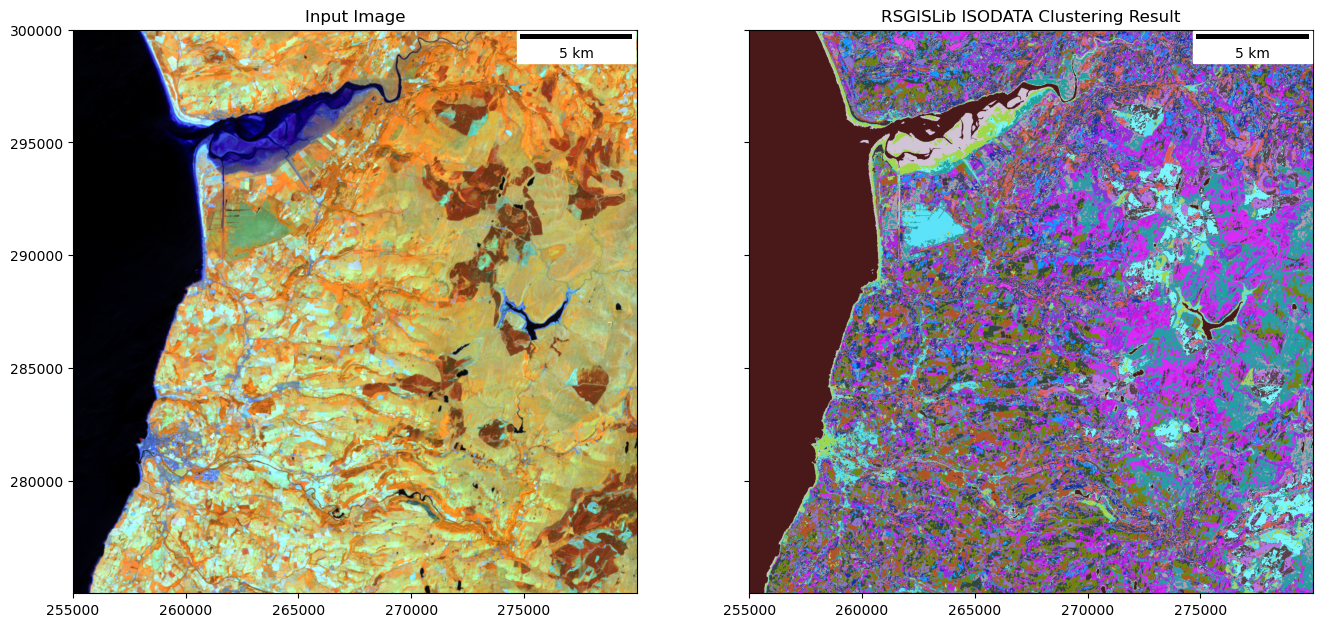

In [15]:
# Define a bbox for the subset to be displayed
sub_img_bbox = [255000, 280000, 275000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[8, 9, 3],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=sub_img_bbox,
    show_scale_bar=True,
)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img, bbox=sub_img_bbox)
ax2.title.set_text("RSGISLib ISODATA Clustering Result")